# Preparations

- Mount Google Drive 
- Copy and extract data,
- Checkout or pull to get the latest code from github.

In [20]:
import os, time

colab_data_dir = "/content/data/"
gdrive_workspace = r"/gdrive/My Drive/colab_workspace/advertima/data"

if not os.path.exists(colab_data_dir):
  !mkdir {colab_data_dir}
  print("Data folder created.")

if not os.path.exists("/gdrive"):
  print("Mounting google drive")
  from google.colab import drive
  drive.mount('/gdrive')
print("Google drive is mounted at /gdrive")
  
traindata_prefix = "300W_LP"
traindata_dir = os.path.join(colab_data_dir, traindata_prefix)
testdata_prefix = "AFLW2000"
testdata_dir = os.path.join(colab_data_dir, testdata_prefix)  
  
  
start_time = time.time()
if not os.path.exists(traindata_dir):  
  print("Extracting {}...".format(traindata_prefix))
  !unzip -qq -n {os.path.join(gdrive_workspace.replace(" ", "\ "), traindata_prefix) + ".zip"} -d  {colab_data_dir}
elapsed_time = time.time() - start_time
print("{} is ready ({:.1f} sec)".format(os.path.join(colab_data_dir, traindata_prefix), elapsed_time))
  
start_time = time.time()
if not os.path.exists(testdata_dir):  
  print("Extracting {}...".format(testdata_prefix)),
  !unzip -qq -n {os.path.join(gdrive_workspace.replace(" ", "\ "), testdata_prefix) + ".zip"} -d  {colab_data_dir}
elapsed_time = time.time() - start_time
print("{} is ready ({:.1f} sec)".format(os.path.join(colab_data_dir, testdata_prefix), elapsed_time))

!ls {colab_data_dir}

Google drive is mounted at /gdrive
/content/data/300W_LP is ready (0.0 sec)
/content/data/AFLW2000 is ready (0.0 sec)
300W_LP  300W_LP_filenames.txt	AFLW2000  AFLW2000_filenames.txt


**Code from github**

In [37]:
%cd /content
if not os.path.exists("/content/deep-head-pose"):
  # Clone the entire repo.
  !git clone -l -s https://github.com/emredog/deep-head-pose.git deep-head-pose
  %cd deep-head-pose/code
else:
  %cd deep-head-pose/code
  !git pull

/content
/content/deep-head-pose/code
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/emredog/deep-head-pose
   363c0b7..83561b6  master     -> origin/master
Updating 363c0b7..83561b6
Fast-forward
 code/train_hopenet_mobilenet.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


**Fetch or generate filenames**

In [5]:
from shutil import copyfile
import utils
       
  

for prefix in [traindata_prefix, testdata_prefix]:
  if not os.path.exists(os.path.join(colab_data_dir, prefix + "_filenames.txt")):
    # check the cache
    if os.path.exists(os.path.join(gdrive_workspace, prefix + "_filenames.txt")):
      copyfile(os.path.join(gdrive_workspace, prefix + "_filenames.txt"), 
               os.path.join(colab_data_dir, prefix + "_filenames.txt"))
    else:
      # generate from scratch
      utils.generate_filenames(os.path.join(colab_data_dir, prefix))
      copyfile(os.path.join(colab_data_dir, prefix + "_filenames.txt"), 
               os.path.join(gdrive_workspace, prefix + "_filenames.txt"))
    

  
print("Filenames files are ready.")
!ls -l {colab_data_dir}

Filenames files are ready.
total 4692
drwxr-xr-x 12 root root    4096 Nov 25  2015 300W_LP
-rw-r--r--  1 root root 4618569 Aug 14 05:11 300W_LP_filenames.txt
drwxr-xr-x  3 root root  139264 Mar 29  2016 AFLW2000
-rw-r--r--  1 root root   39380 Aug 14 05:11 AFLW2000_filenames.txt


# Training Hopenet on 300W_LP
Let's reproduce the training process in the paper





In [0]:
# batch size is 128, see https://github.com/natanielruiz/deep-head-pose/issues/55

# filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
# !python train_hopenet.py --num_epochs 5 --batch_size 128 --lr 10e-5 --dataset AFLW2000 --data_dir /content/data --alpha 2 --filename_list {filename_list} --output_string Debug_on_AFLW2000 --out_dir {gdrive_workspace.replace(" ", "\ ")}

filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
!python train_hopenet.py --num_epochs 25 --batch_size 128 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --output_string Reproduce_300W_LP_ --out_dir {gdrive_workspace.replace(" ", "\ ")}


Loading data.
Ready to train network.
Epoch [1/25], Iter [100/956] Losses: Yaw 208.4192, Pitch 260.9868, Roll 151.6089
Epoch [1/25], Iter [200/956] Losses: Yaw 117.3504, Pitch 220.0611, Roll 180.0715
Epoch [1/25], Iter [300/956] Losses: Yaw 103.4418, Pitch 181.4670, Roll 102.9651
Epoch [1/25], Iter [400/956] Losses: Yaw 84.4190, Pitch 110.1129, Roll 113.1441
Epoch [1/25], Iter [500/956] Losses: Yaw 52.0928, Pitch 72.8473, Roll 73.6279
Epoch [1/25], Iter [600/956] Losses: Yaw 5009.6548, Pitch 398.6605, Roll 429.7704
Epoch [1/25], Iter [700/956] Losses: Yaw 1925.0472, Pitch 321.9773, Roll 316.0841
Epoch [1/25], Iter [800/956] Losses: Yaw 1863.8120, Pitch 316.4185, Roll 267.6097
Epoch [1/25], Iter [900/956] Losses: Yaw 503.2821, Pitch 206.6443, Roll 260.0581
Epoch completed in 1196.1 seconds. Taking snapshot...
Epoch [2/25], Iter [100/956] Losses: Yaw 400.2158, Pitch 269.2081, Roll 251.8150
Epoch [2/25], Iter [200/956] Losses: Yaw 1531.4432, Pitch 300.8517, Roll 248.9890
Epoch [2/25], Ite

In [1]:
!ls /content/deep-head-pose/code/output/snapshots/

ls: cannot access '/content/deep-head-pose/code/output/snapshots/': No such file or directory


## Display Losses

21054


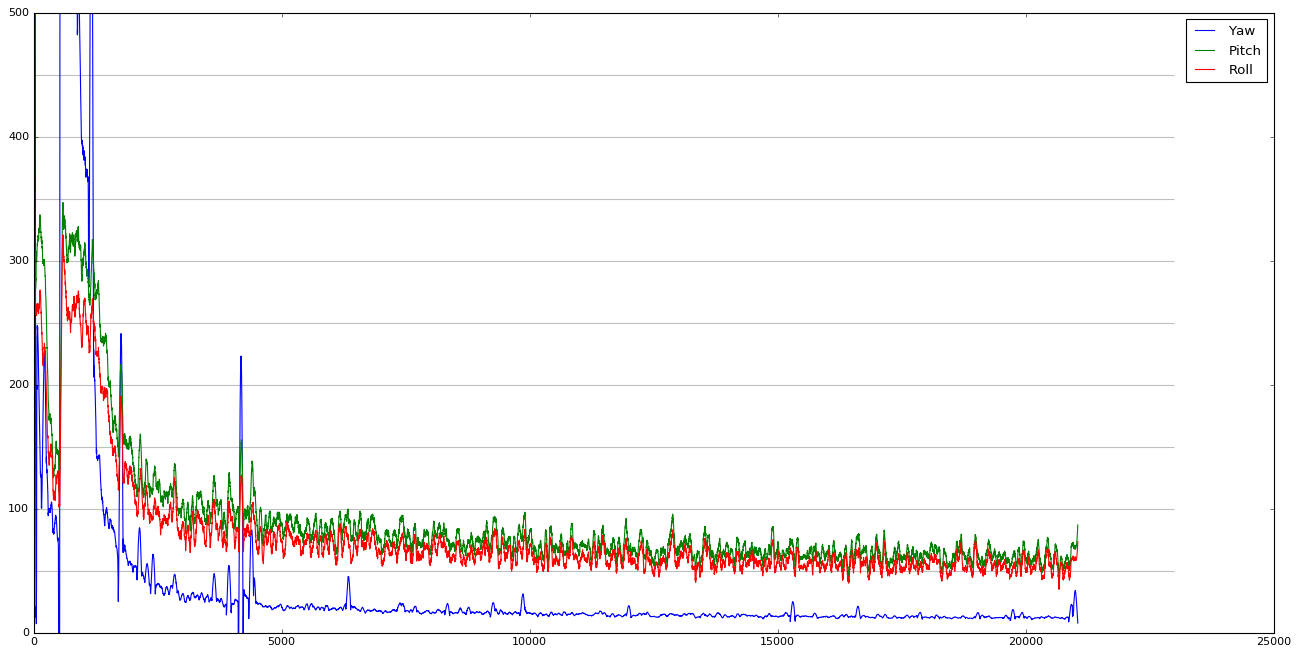

In [12]:
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # smoothing the curves
plt.style.use('classic')
%matplotlib inline

loss_file = gdrive_workspace + "/lossesReproduce_300W_LP_.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats = pkl.load(file_handle)
  
print(len(training_stats["loss_yaw"]))

smoothing = lambda x: savgol_filter(x, 101, 3)

fig=plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(smoothing(training_stats["loss_yaw"]), label="Yaw")
plt.plot(smoothing(training_stats["loss_pitch"]), label="Pitch")
plt.plot(smoothing(training_stats["loss_roll"]), label="Roll")

plt.hlines(list(range(0, 500, 50)), 0, 23000, color='0.75')
plt.ylim(0, 500)
plt.legend()
plt.show()            

# Test with pretrained & reproduced model
**First, let's test with the provided pre-trained model (downloadable from original github page).**

In [18]:
model_path = os.path.join(gdrive_workspace, "weights", "hopenet_alpha2.pkl")

filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 64 --dataset AFLW2000 --data_dir /content/data --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 6.4682, Pitch: 6.5448, Roll: 5.4226


Result: Yaw: 6.4682, Pitch: 6.5448, Roll: 5.4226

This is pretty close to Table 1 in paper.

**Now, try it with the model that I trained. NOTE: it was trained only for 22 epochs (due to Colab limitations), so I expect worse results than the pre-trained model, which was trained for 25 epochs according to paper.**

In [19]:
model_path = os.path.join(gdrive_workspace, "reproducing_paper_results", "Reproduce_300W_LP__epoch_22.pkl")

filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 64 --dataset AFLW2000 --data_dir /content/data --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 17.3588, Pitch: 9.3072, Roll: 9.1508


Result: Yaw: 17.3588, Pitch: 9.3072, Roll: 9.1508

**The gap is rather large, actually a bit higher than what I expected.**.

# Train a Hopenet variant with Mobilenet backbone

In [38]:
filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
val_filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python train_hopenet_mobilenet.py --num_epochs 10 --batch_size 128 --lr 10e-5 --dataset AFLW2000 --data_dir /content/data --alpha 2 --filename_list {filename_list} --val_filename_list {val_filename_list} --output_string DebugMobileNet2_on_AFLW2000 --out_dir {gdrive_workspace.replace(" ", "\ ")}

Loading data.
Ready to train network.
Epoch completed in 14.6 seconds. Taking snapshot...
Validation error in degrees of the model on the 1969 test images. Yaw: 15.9833, Pitch: 11.8631, Roll: 13.6062
Epoch completed in 14.5 seconds. Taking snapshot...
Validation error in degrees of the model on the 1969 test images. Yaw: 8.4140, Pitch: 9.3511, Roll: 13.4215
Epoch completed in 14.6 seconds. Taking snapshot...
Validation error in degrees of the model on the 1969 test images. Yaw: 6.5533, Pitch: 9.6458, Roll: 12.9999
Epoch completed in 14.5 seconds. Taking snapshot...
Validation error in degrees of the model on the 1969 test images. Yaw: 5.5717, Pitch: 6.7381, Roll: 12.5184
Epoch completed in 14.7 seconds. Taking snapshot...
Validation error in degrees of the model on the 1969 test images. Yaw: 5.6969, Pitch: 6.6566, Roll: 11.6756
Epoch completed in 14.8 seconds. Taking snapshot...
Validation error in degrees of the model on the 1969 test images. Yaw: 4.9333, Pitch: 5.5584, Roll: 10.3505


## Display losses

160


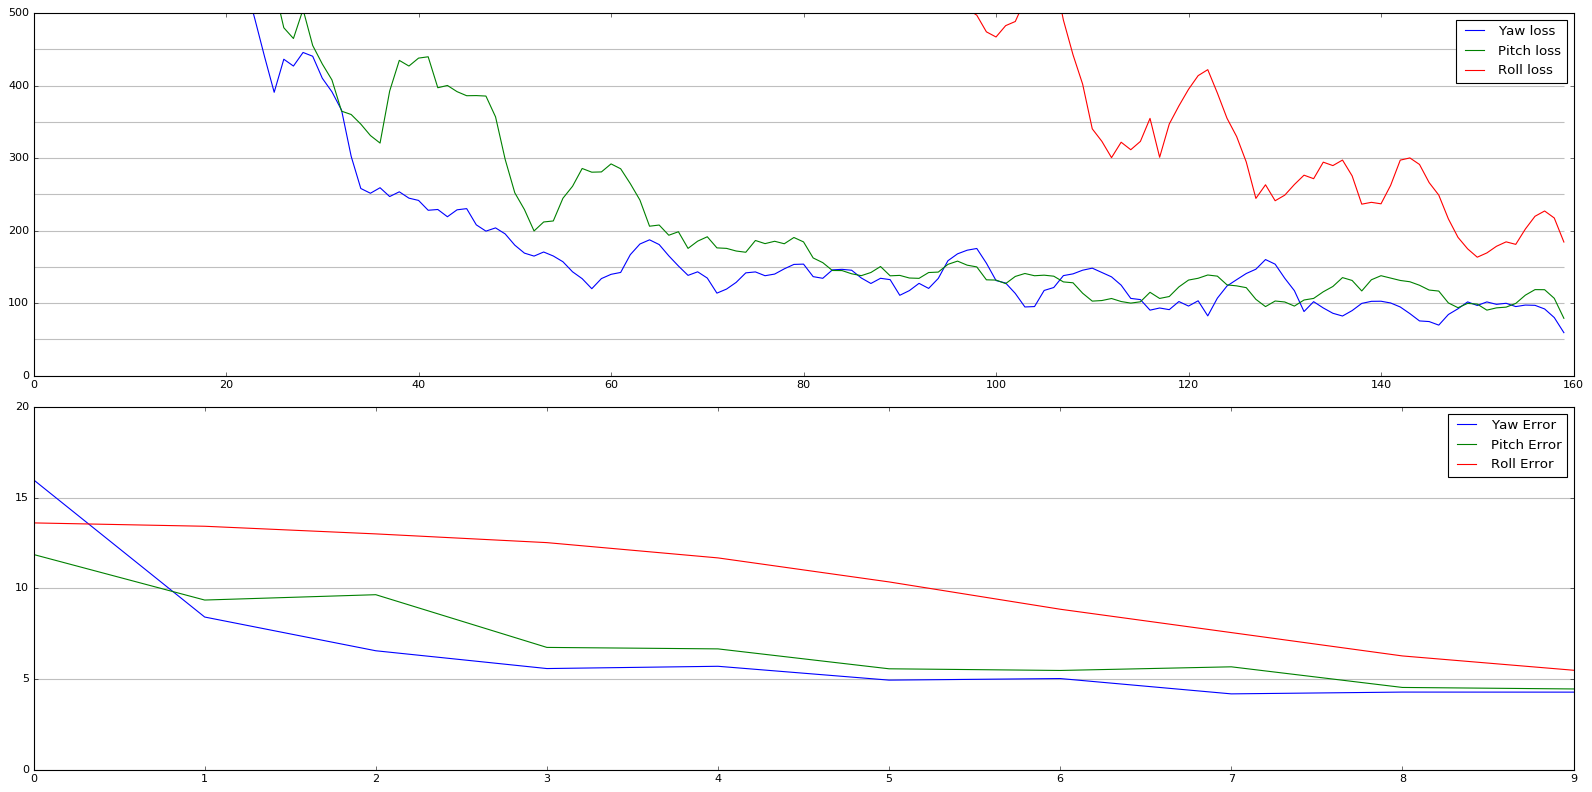

In [54]:
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # smoothing the curves
plt.style.use('classic')
%matplotlib inline

loss_file = gdrive_workspace + "/lossesDebugMobileNet2_on_AFLW2000.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats = pkl.load(file_handle)
  
print(len(training_stats["loss_yaw"]))

smoothing = lambda x: savgol_filter(x, 11, 3)

train_samples = len(training_stats["loss_yaw"])
val_samples = len(training_stats["val_yaw_error"])


f, axes = plt.subplots(2, 1, sharex="none", figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
axes[0].plot(range(train_samples), smoothing(training_stats["loss_yaw"]), label="Yaw loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_pitch"]), label="Pitch loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_roll"]), label="Roll loss")
axes[0].hlines(list(range(0, 500, 50)), 0, train_samples-1, color='0.75')
axes[0].set_ylim(0, 500)
axes[0].legend()

axes[1].plot(training_stats["val_yaw_error"], label="Yaw Error")
axes[1].plot(training_stats["val_pitch_error"], label="Pitch Error")
axes[1].plot(training_stats["val_roll_error"], label="Roll Error")
axes[1].hlines(list(range(0, 20, 5)), 0, val_samples-1, color='0.75')
axes[1].set_ylim(0, 20)
axes[1].legend()

f.tight_layout()
plt.show()